In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
infos_ufs = gpd.read_file("bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

In [17]:
infos_ufs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   nome                 27 non-null     object  
 1   nomeabrev            0 non-null      float64 
 2   geometriaaproximada  27 non-null     object  
 3   UF                   27 non-null     object  
 4   geocodigo            27 non-null     object  
 5   id_produtor          27 non-null     int64   
 6   id_elementoprodutor  0 non-null      float64 
 7   cd_insumo_orgao      11 non-null     float64 
 8   nr_insumo_mes        0 non-null      float64 
 9   nr_insumo_ano        0 non-null      float64 
 10  tx_insumo_documento  0 non-null      float64 
 11  geometry             27 non-null     geometry
dtypes: float64(6), geometry(1), int64(1), object(4)
memory usage: 2.7+ KB


In [3]:
data = pd.read_csv("dataset/Leitos_2022.csv", encoding='utf-8')

In [4]:
infos_ufs['sigla'].unique()

array(['GO', 'MS', 'PR', 'MG', 'SE', 'AL', 'TO', 'RR', 'AM', 'AC', 'RO',
       'DF', 'PI', 'PB', 'CE', 'SC', 'RJ', 'AP', 'PA', 'ES', 'BA', 'MT',
       'PE', 'RN', 'MA', 'SP', 'RS'], dtype=object)

In [5]:
data[data["UF"] == "PA"]["LEITOS EXISTENTE"].sum()

204797

In [6]:
data[data["UF"] == "SP"]["LEITOS EXISTENTE"].sum()

1316256

In [7]:
infos_ufs.rename({'sigla': "UF"}, axis=1, inplace=True)

In [8]:
brasil = infos_ufs.merge(data, on="UF", how="left")

In [9]:
brasil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85313 entries, 0 to 85312
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   nome                     85313 non-null  object  
 1   nomeabrev                0 non-null      float64 
 2   geometriaaproximada      85313 non-null  object  
 3   UF                       85313 non-null  object  
 4   geocodigo                85313 non-null  object  
 5   id_produtor              85313 non-null  int64   
 6   id_elementoprodutor      0 non-null      float64 
 7   cd_insumo_orgao          44479 non-null  float64 
 8   nr_insumo_mes            0 non-null      float64 
 9   nr_insumo_ano            0 non-null      float64 
 10  tx_insumo_documento      0 non-null      float64 
 11  geometry                 85313 non-null  geometry
 12  COMP                     85313 non-null  int64   
 13  REGIAO                   85313 non-null  object  
 14

In [10]:
infeno = brasil[['UF', "LEITOS EXISTENTE", "geometry"]]

<Axes: >

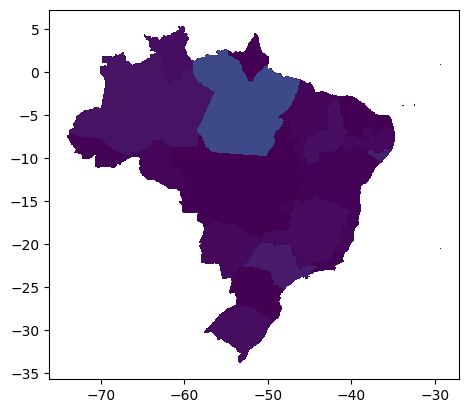

In [11]:
infeno.plot(column='LEITOS EXISTENTE')

<Axes: >

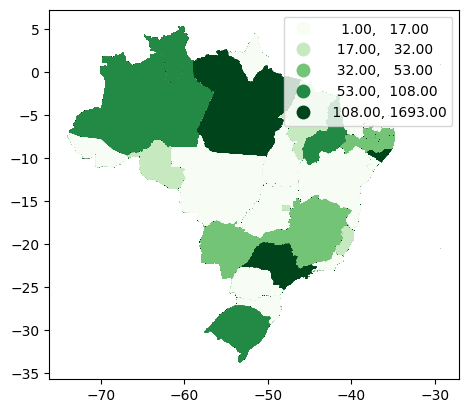

In [12]:
brasil.plot(column='LEITOS EXISTENTE',
            legend=True,
            cmap='Greens',
            scheme="quantiles")

In [13]:
brasil[brasil["UF"] == "BA"]["LEITOS EXISTENTE"].sum()

398057

In [14]:
# %matplotlib inline

# brasil.plot(column='LEITOS EXISTENTE',
#             cmap='OrRd',
#             figsize=(16,10),
#             legend = True,
#             edgecolor='black')
